In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

from scipy.stats import mode

În această lecție vom lucra cu algoritmul **KNN - K Nearest Neighbors**. Acesta este un algortm din Învățarea Automată neparametrizat, adică nu există un set de parametri pe care modelul trebuie să-i învețe. 

Setul de date cu care vom lucra în această lecție conține informații despre persoane care și-au cumpărat (sau nu) un IPhone. Datele de intrare conțin. caracteristici precum *Gender* - sexul persoanei, *Age* - Vârsta persoanei, *Salary* - salariul persoanei, și caracteristica binară țintă (target) *Purchase Iphone* - daca persoana și-a cumpărat sau nu un IPhone.

In [2]:
dataset = pd.read_csv("data/iphone_purchase_records.csv")
dataset.head()

,Gender,Age,Salary,Purchase Iphone
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [3]:
# dataset = dataset.drop('Gender', axis=1)
d = {"Male": 0, "Female": 1}
dataset["Gender"] = dataset["Gender"].map(d)


In [4]:
dataset.head()

,Gender,Age,Salary,Purchase Iphone
0,0,19,19000,0
1,0,35,20000,0
2,1,26,43000,0
3,1,27,57000,0
4,0,19,76000,0


In [5]:
dataset.describe()

,Gender,Age,Salary,Purchase Iphone
count,400.000000,400.000000,400.000000,400.000000
mean,0.510000,37.655000,69742.500000,0.357500
std,0.500526,10.482877,34096.960282,0.479864
min,0.000000,18.000000,15000.000000,0.000000
25%,0.000000,29.750000,43000.000000,0.000000
50%,1.000000,37.000000,70000.000000,0.000000
75%,1.000000,46.000000,88000.000000,1.000000
max,1.000000,60.000000,150000.000000,1.000000


Definim X si y

In [6]:
y = dataset["Purchase Iphone"]
X = dataset.drop("Purchase Iphone", axis=1)
X.head()

,Gender,Age,Salary
0,0,19,19000
1,0,35,20000
2,1,26,43000
3,1,27,57000
4,0,19,76000


Vizualizam datele cu care lucram. Sa ne uitam la distribbutia salariului, si cum asta este legat de celelalte caracteristici.

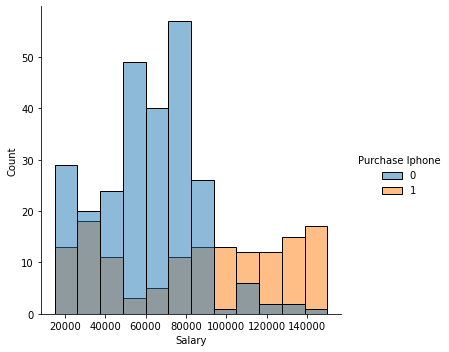

In [7]:
sns.displot(dataset, x='Salary', hue='Purchase Iphone') # hue ne arata culoarea

Putem observa, în baza graficului de mai sus, că odată cu creșterea salariului crește și numărul persoanelor care ajung să-și cumpere un IPhone. Cu toate acestea, există și un număr semnificativ de persoane care primesc puțini bani dar oricum decid să-și cumpere un IPhone.

In [8]:
def euclidean_distance(point_a, point_b):
    distance = np.linalg.norm(point_a - point_b)
    return distance

In [9]:
point_a = np.array([3, 4])
point_b = np.array([5, 9])
euclidean_distance(point_a, point_b)

5.385164807134504

In [10]:
# verificam
from math import sqrt

d = sqrt((point_a[0] - point_b[0])**2 + (point_a[1] - point_b[1])**2)
d

5.385164807134504

In [11]:
d == euclidean_distance(point_a, point_b)

True

In [12]:
def knn(X_train, X_test, Y_train, Y_test, k):
    y_hat = []
    for test_pt in X_test.to_numpy():
        distances = []
        
        for i in range(len(X_train)):
            distances.append(euclidean_distance(np.array(X_train.iloc[i]), test_pt))
        
        distance_data = pd.DataFrame(data=distances, columns=['distance'], index=Y_train.index)
        
        k_neighbors_list = distance_data.sort_values(by=['distance'], axis=0)[:k]

        labels = Y_train.loc[k_neighbors_list.index]
        
        voting = mode(labels).mode[0]
        
        y_hat.append(voting)
        
    return y_hat
        

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=42) # seed to reproduce the randomness
y_hat_test = knn(X_train, X_test, Y_train, Y_test, 5)

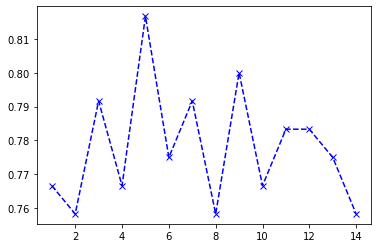

In [14]:
accuracy_vals = []
for i in range(1, 15):
    y_hat_test = knn(X_train, X_test, Y_train, Y_test, i)
    accuracy_vals.append(accuracy_score(Y_test, y_hat_test))
    
plt.plot(range(1, 15), accuracy_vals, color='blue', marker='x', linestyle='dashed')

In [15]:
y_hat_test = knn(X_train, X_test, Y_train, Y_test, k=5)
print(accuracy_score(Y_test, y_hat_test))

0.8166666666666667


Text(0.5, 1.0, 'KNN Predictions')

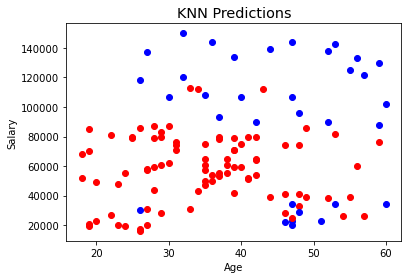

In [16]:
for i in range(len(y_hat_test)):
    if (y_hat_test[i] == 0):
        plt.scatter(X_test.iloc[i]['Age'], X_test.iloc[i]['Salary'], color='red')
        
    if (y_hat_test[i] == 1):
        plt.scatter(X_test.iloc[i]['Age'], X_test.iloc[i]['Salary'], color='blue')
        
plt.style.use('ggplot')
plt.xlabel("Age")
plt.ylabel("Salary")
plt.title("KNN Predictions")

Text(0.5, 1.0, 'KNN Original Values')

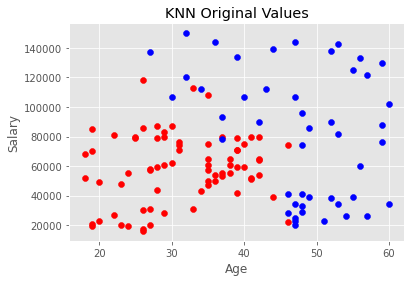

In [17]:
# acum sa vedem valorile adevarate
for i, test_pt in enumerate(Y_test.to_numpy()):    
    if (test_pt == 0):
        plt.scatter(X_test.iloc[i]['Age'], X_test.iloc[i]['Salary'], color='red')
        
    if (test_pt == 1):
        plt.scatter(X_test.iloc[i]['Age'], X_test.iloc[i]['Salary'], color='blue')
        
plt.style.use('ggplot')
plt.xlabel("Age")
plt.ylabel("Salary")
plt.title("KNN Original Values")

In [18]:
dataset.head()

,Gender,Age,Salary,Purchase Iphone
0,0,19,19000,0
1,0,35,20000,0
2,1,26,43000,0
3,1,27,57000,0
4,0,19,76000,0


Incercam implementarea de la sklearn:


In [19]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, Y_train)

y_hat = knn_model.predict(X_test)
print(accuracy_score(Y_test, y_hat))

0.8166666666666667
